# Visualize peptide library with Umap

In [2]:
import math as math
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys
import numpy as np

import matplotlib.pyplot as plt
from utils import get_df_results

import umap
import umap.plot


In [2]:
pkl_path = './Reprs/Model_VPGLA_repr.out.pkl'
lib_path = './Pep_lib_VPGLA.smi'

# load unimol features
df = get_df_results(pkl_path)
df_lib = pd.read_csv(lib_path, delimiter='\t')
len(df_lib)

625

In [3]:
# Fingerprints
fp_list = []
for i in df_lib.index.to_list():
    mol = Chem.MolFromSmiles(df_lib['SMILES'][i])
    fp = MACCSkeys.GenMACCSKeys(mol)
    fp_list.append(fp)

df_fp = pd.DataFrame(fp_list, columns=['fp'])
X_fp = pd.DataFrame(df_fp['fp'].apply(tuple).to_list())
X_fp.shape

(625, 167)

In [4]:
# split representation (unimol feature)
X = pd.DataFrame(df['mol_repr'].apply(tuple).to_list())
X.shape

(625, 512)

# Using Umap to plot uni-mol generated chemical space

## Visualize 625 peptides library 

In [5]:
reducer = umap.UMAP()
# feature_data = X.values
feature_data = X.values
embedding = reducer.fit_transform(feature_data) # default reduces dimensions to 2d.
embedding.shape

(625, 2)

/home/troy/miniconda3/envs/unimol/lib/python3.8/site-packages/umap/plot.py:448: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

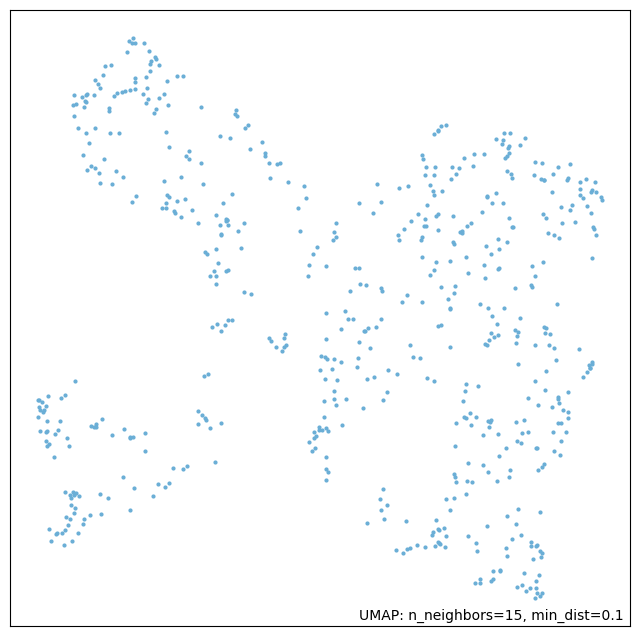

In [6]:
# Umap pca and chemical space visualization
mapper = umap.UMAP().fit(feature_data)
umap.plot.points(mapper)

<Axes: title={'center': 'Colored by RGB coords of PCA embedding'}>

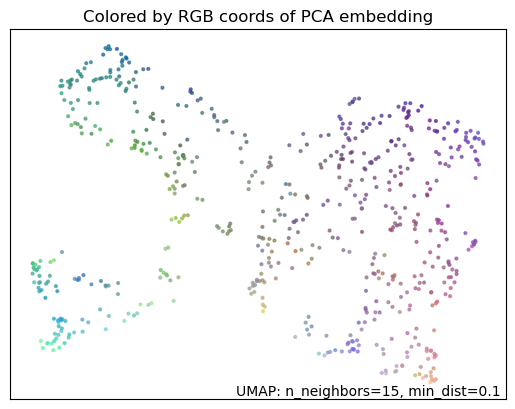

In [7]:
umap.plot.diagnostic(mapper, diagnostic_type='pca')

## Dimension reduction and clustering libraries

In [3]:
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [9]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(feature_data)

In [10]:
# optimize clustering by UMAP

clusterable_embedding = umap.UMAP(
    n_neighbors=15,
    min_dist=0.01,
    n_components=3,
    random_state=42,
).fit_transform(feature_data)

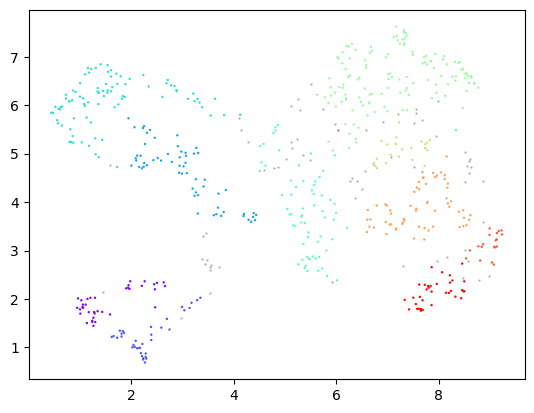

In [11]:
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=15,
).fit_predict(clusterable_embedding)

clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.5,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.5,
            cmap='rainbow')

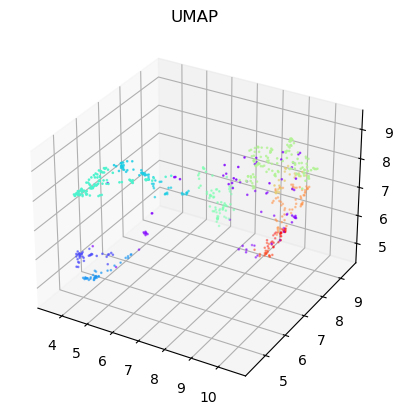

In [ ]:
# draw 3-dimensions scatter plot of UMAP
def draw_3d_scatter_plot(X, y, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=0.8, c=y, cmap='rainbow')
    ax.set_title(title)
    plt.show()
draw_3d_scatter_plot(clusterable_embedding, labels, 'UMAP')

In [12]:
# 输出聚类的结果
def save_clustered_results(features, labels, save_path):
    clusters = np.unique(labels)
    for i in range(len(clusters)):
        sub_df = []
        for j in range(len(X)):
            if labels[j] == clusters[i]:
                sub_df.append(features.loc[j])
        print(i)
        print(len(sub_df[0]))
        sub_df = pd.DataFrame(sub_df)
        sub_df.to_csv(save_path+'/cluster_{}.csv'.format(i), header=False,index = False)

In [13]:
# # # labels中的元素种类
print(np.unique(labels))
pd.DataFrame((labels)).to_csv('./cluster/results_VPGLA/pca-3-cluster.csv', header = False ,index = True)
pd.DataFrame((X)).to_csv('./cluster/results_VPGLA/VPGLA_feature.csv', header = False ,index = False)

[-1  0  1  2  3  4  5  6  7  8  9]


## Visualize FingerPrint representations

In [9]:
reducer_fp = umap.UMAP()
fp_data = X_fp.values
embedding_fp = reducer_fp.fit_transform(fp_data) # default reduces dimensions to 2d.
embedding_fp.shape

(625, 2)

/home/troy/miniconda3/envs/unimol/lib/python3.8/site-packages/umap/plot.py:448: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

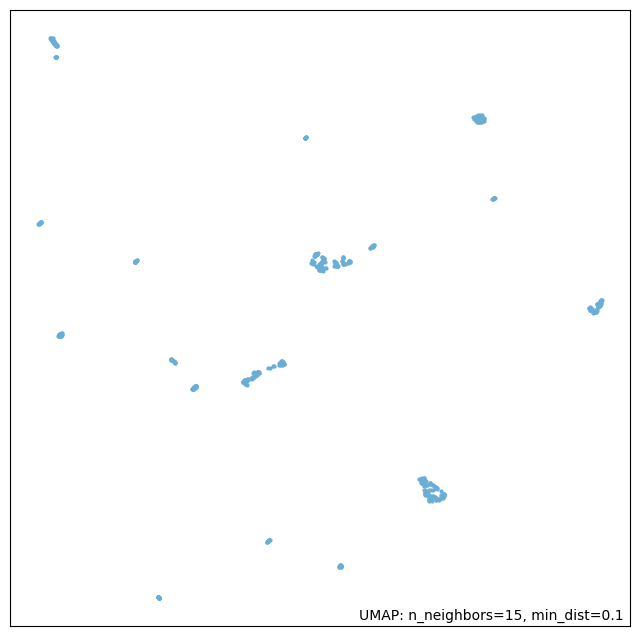

In [10]:
# Umap pca and chemical space visualization
mapper = umap.UMAP().fit(fp_data)
umap.plot.points(mapper)

# Visualize Larger chemical space

In [7]:
pkl_path2 = './Reprs/Model_VPpGLA_repr.out.pkl'
lib_path2 = './Pep_lib_VPpGLA.smi'

# load unimol features
df2 = get_df_results(pkl_path2)
df_lib2 = pd.read_csv(lib_path2, delimiter='\t')
print(len(df_lib2))

X_2 = pd.DataFrame(df2['mol_repr'].apply(tuple).to_list())
print(X_2.shape)

1296
(1296, 512)


/home/troy/miniconda3/envs/unimol/lib/python3.8/site-packages/umap/plot.py:448: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

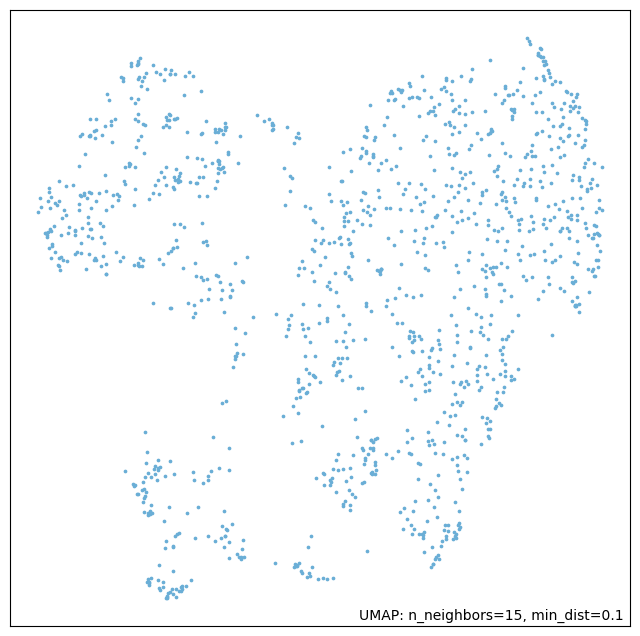

In [8]:
reducer_2 = umap.UMAP()
feature_data_2 = X_2.values
embedding_2 = reducer_2.fit_transform(feature_data_2) # default reduces dimensions to 2d.
embedding_2.shape

mapper_2 = umap.UMAP().fit(feature_data_2)
umap.plot.points(mapper_2)

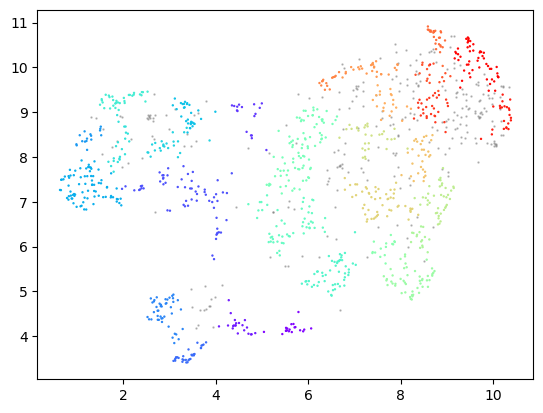

In [10]:
standard_embedding_2 = umap.UMAP(random_state=42).fit_transform(feature_data_2)


clusterable_embedding_2 = umap.UMAP(
    n_neighbors=15,
    min_dist=0.01,
    n_components=2,
    random_state=42,
).fit_transform(feature_data_2)

labels_2 = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=15,
).fit_predict(clusterable_embedding_2)

clustered_2 = (labels_2 >= 0)
plt.scatter(standard_embedding_2[~clustered_2, 0],
            standard_embedding_2[~clustered_2, 1],
            color=(0.5, 0.5, 0.5),
            s=0.5,
            alpha=0.5)
plt.scatter(standard_embedding_2[clustered_2, 0],
            standard_embedding_2[clustered_2, 1],
            c=labels_2[clustered_2],
            s=0.5,
            cmap='rainbow')